<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [37]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



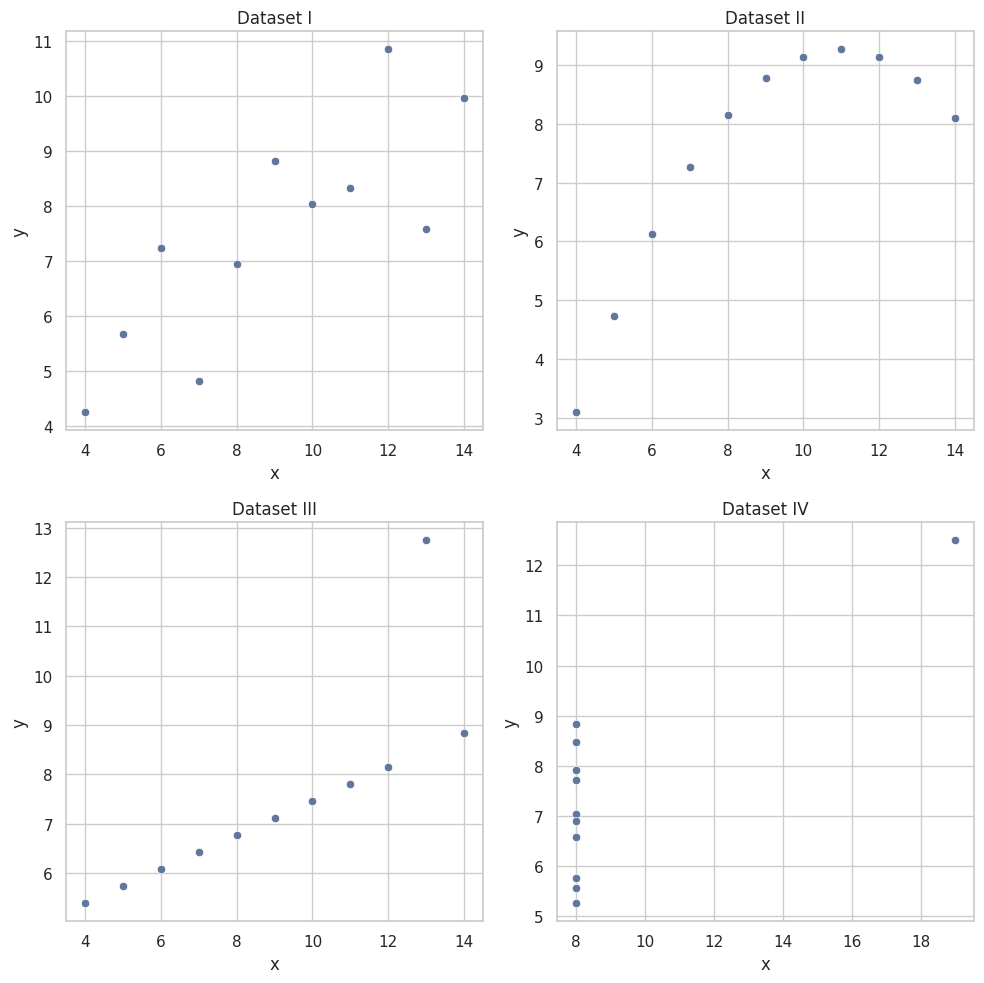

In [38]:
# Se crea un gráfico de dispersión para cada grupo.
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, dataset in enumerate(data['dataset'].unique()):
    subset = data[data['dataset'] == dataset]
    sns.scatterplot(x='x', y='y', data=subset, ax=axes[i])
    axes[i].set_title(f'Dataset {dataset}')

plt.tight_layout()
plt.show()

Las diferencias significativas que puedo identificar, y que además son características particulares que se observan en cada uno que sugieren compartamientos distintos son que para el primer grupo la relación lineal es positiva clara con dispersión homogénea, para el segundo grupo el patrón curvilíneo, es decir, no lineal, donde una recta no describe bien la tendencia, para el tercer grupo es casi lineal, pero un outlier con alto leverage distorsiona el ajuste, y por último para el cuarto grupo la mayoría de puntos comparten x casi constante y un outlier domina la correlación.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [39]:
# Se usa describe para obtener un resumen estadístico por grupo.
summary_stats = data.groupby('dataset').describe()

display(summary_stats)

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

El describe muestra que los cuatro grupos tienen medias, varianzas y cuartiles muy similares en x e y, lo que aisladamente sugeriría distribuciones equivalentes. No obstante, esos resúmenes ocultan estructuras distintas. En I la relación es lineal, en II la tendencia es curvilínea, en III un outlier con alto leverage distorsiona la relación, y en IV muchos puntos comparten x casi constante y un único punto domina la correlación. Por ello, las estadísticas descriptivas deben complementarse con visualización para captar la forma real de cada patrón.


3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Dataset I:
  MSE: 1.2512
  R²: 0.6665


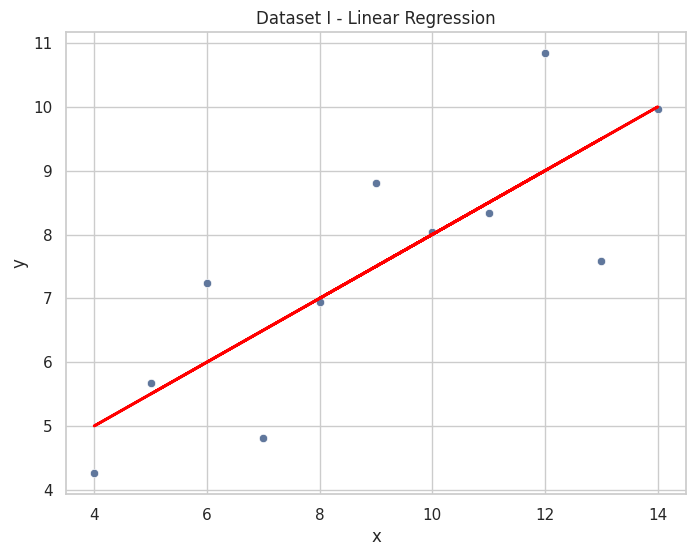

Dataset II:
  MSE: 1.2524
  R²: 0.6662


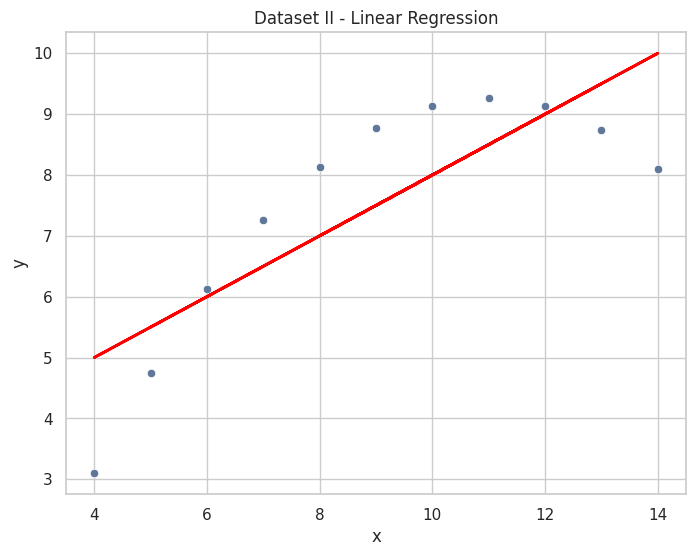

Dataset III:
  MSE: 1.2506
  R²: 0.6663


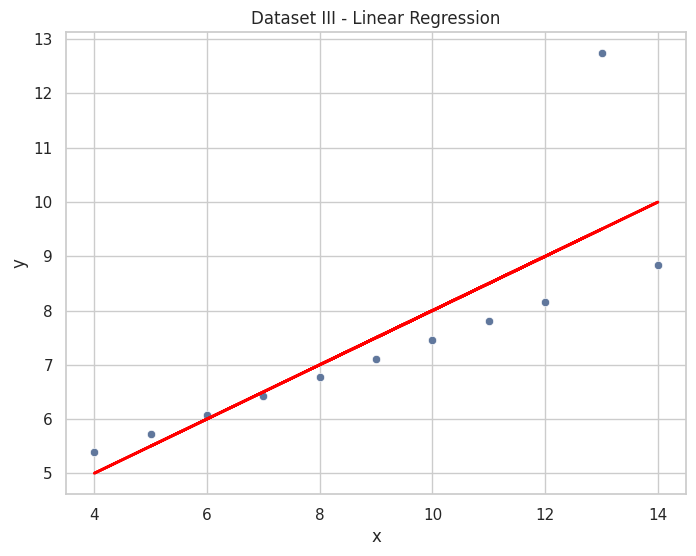

Dataset IV:
  MSE: 1.2493
  R²: 0.6667


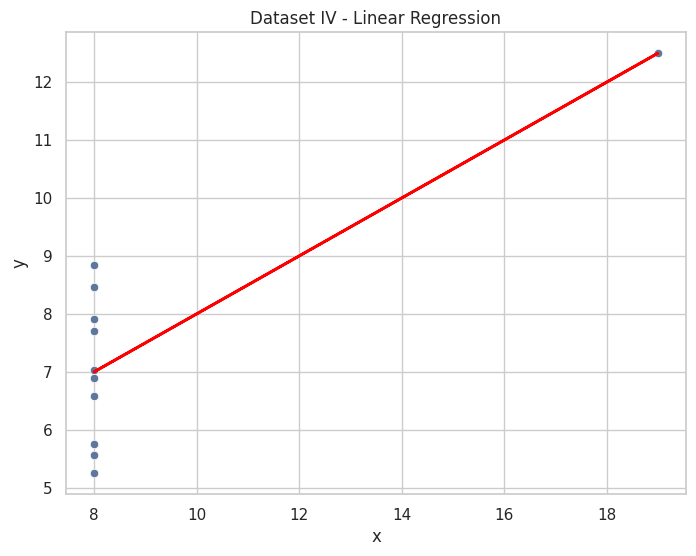

In [40]:
# Ajustar un modelo de regresión lineal para cada grupo y calcular métricas
for dataset in data['dataset'].unique():
    subset = data[data['dataset'] == dataset]

    X = subset[['x']]
    y = subset['y']

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f'Dataset {dataset}:')
    print(f'  MSE: {mse:.4f}')
    print(f'  R²: {r2:.4f}')

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='x', y='y', data=subset)
    plt.plot(X, y_pred, color='red', linewidth=2)
    plt.title(f'Dataset {dataset} - Linear Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Los ajustes lineales arrojan MSE y R² muy similares entre los cuatro grupos, lo que podría sugerir de una forma engañosa que se podrían comparar.
Desde la visualización vesmo que se revelan diferencias. En I se ajusta bien, en II es curvilíneo, en III y IV están dominados por outliers de alto leverage. De esto podemos llegar a concluir que las métricas agregadas no bastan, ya que hay que revisar los gráficos y residuos y, si corresponde, usar modelos no lineales o métodos robustos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

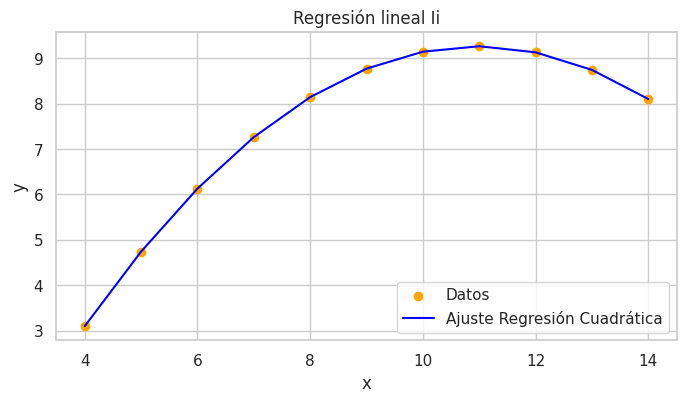

MSE: 4.138495729542357e-12
R^2: 0.9999994578574282


In [41]:
from sklearn.preprocessing import PolynomialFeatures
group_2 = data[data['dataset'] == 'II']

X = group_2['x'].values.reshape(-1, 1)
y = group_2['y'].values

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


modelo = LinearRegression()

modelo.fit(X_poly, y)

y_pred = modelo.predict(X_poly)

plt.figure(figsize=(8, 4))
plt.scatter(group_2['x'], group_2['y'], color='orange', label='Datos')
sns.lineplot(x=group_2['x'], y=y_pred, color='blue', label='Ajuste Regresión Cuadrática')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal Ii')
plt.legend()
plt.show()


mse = mean_squared_error(y_pred, group_2['y'])**2
r2 = r2_score(y_pred, group_2['y'])
print(f"MSE: {mse}")
print(f"R^2: {r2}")


MSE: 5.7720526227008334e-11^2
R^2: 0.999993107581533


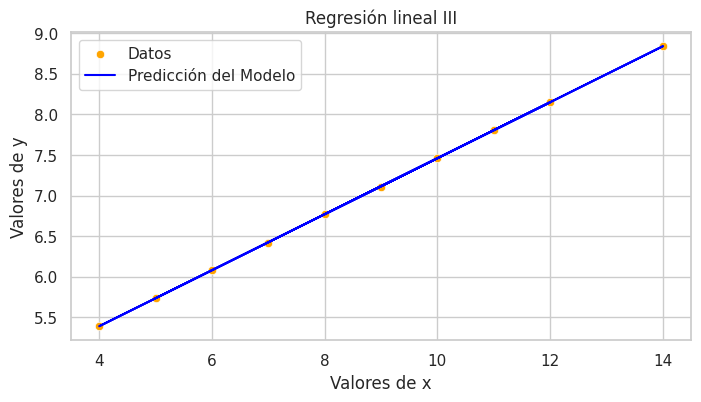

In [42]:
group_3 = data[data['dataset'] == 'III']
#Se quita el outlier
group_3_fixed=group_3.drop(group_3['y'].idxmax())

x = group_3_fixed[['x']].copy()
y = group_3_fixed['y'].copy()

model.fit(x, y)

xfit = x.copy()

yfit = model.predict(xfit)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=group_3_fixed['x'],y=group_3_fixed['y'],color='orange',label='Datos')
plt.plot(xfit,yfit,label='Predicción del Modelo',color='blue')
plt.xlabel('Valores de x')
plt.ylabel('Valores de y')
plt.title('Regresión lineal III')
plt.legend()


mse = mean_squared_error(y, yfit)**2
r2 = r2_score(y, yfit)
print(f"MSE: {mse}^2")
print(f"R^2: {r2}")


MSE: 0.0
R^2: 1.0


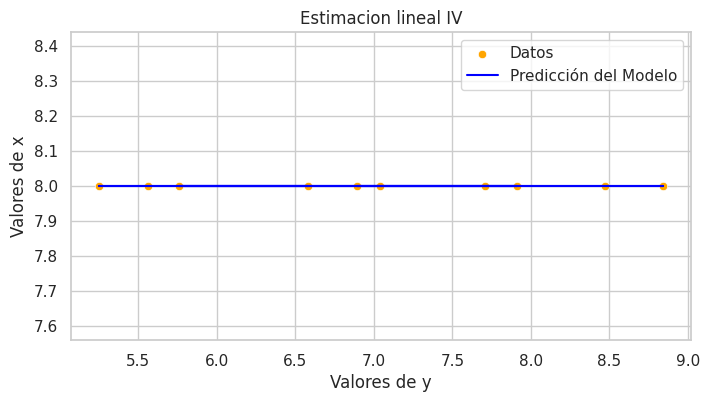

In [43]:
group_4 = data[data['dataset'] == 'IV']
# Se quita el outlier
group_4_fixed=group_4.drop(group_4['y'].idxmax())

x = group_4_fixed[['y']].copy()
y = group_4_fixed['x'].copy()

model.fit(x, y)

xfit = x.copy()

yfit = model.predict(xfit)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=group_4_fixed['y'], y=group_4_fixed['x'],color='orange',label='Datos')
plt.plot(xfit,yfit,label='Predicción del Modelo',color='blue')
plt.xlabel('Valores de y')
plt.ylabel('Valores de x')
plt.title('Estimacion lineal IV')
plt.legend()


mse = mean_squared_error(y, yfit)**2
r2 = r2_score(y, yfit)
print(f"MSE: {mse}")
print(f"R^2: {r2}")


Para II se utiliza una regresion cuadratica en vez de lineal, la cual claramente se adapta mucho mejor a la curva que descrinben los puntos. Para III se elimino el punto Outlier y la regresion lineal se ajusta muy bien. Para IV eliminamos el punto que estaba mas lejano, intercambiamos los valores de los ejes y se obtine una estimacion excelente en x=8.
Para I solo queda bien el ajuste lineal.